In [1]:
from imutils.video import FileVideoStream
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import time
import json
import matplotlib.pyplot as plt

In [2]:
# load file
FILE_NAME = "00485_Chinese_Asian_Female_Young/00485_1"
# define video path
VIDEOPATH = "video/" + FILE_NAME + ".mp4"
# define json path
JSONPATH = "video/" + FILE_NAME + ".json"
# use 68 key points face model
SHAPE_PREDICTOR = "model/shape_predictor_68_face_landmarks.dat"
# define lip region
(LIPFROM, LIPTO) = (49, 68)
# define threshold for lip motion
THRESHOLD = 0.65

In [3]:
# load json info
with open(JSONPATH,'r', encoding='utf-8') as load_f:
    load_dict = json.load(load_f)
# record speaking period
duration = []
for recored in load_dict:
    start = recored['start time']
    end = recored['end time']
    duration.append((start, end))
# print(duration)
# exit()

In [4]:
# define the face detector
DETECTOR = dlib.get_frontal_face_detector()
# define a shape predictor
PREDICTOR = dlib.shape_predictor(SHAPE_PREDICTOR)

In [5]:
# read original video
# fvs = FileVideoStream(path=VIDEOPATH).start()
VC = cv2.VideoCapture(VIDEOPATH)
FRAME_RATE = VC.get(cv2.CAP_PROP_FPS)
print(FRAME_RATE)
# define output video
FRAME_WIDTH = int(VC.get(cv2.CAP_PROP_FRAME_WIDTH))
FRAME_HEIGHT = int(VC.get(cv2.CAP_PROP_FRAME_HEIGHT))
# out = cv2.VideoWriter('video/out_dlib.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (frame_width,frame_height))

24.666666666666668


In [6]:
def lip_aspect_ratio(lip):

    # left top to left bottom
    A = np.linalg.norm(lip[2] - lip[9])  # 51, 59
    # right top to right bottom
    B = np.linalg.norm(lip[4] - lip[7])  # 53, 57
    # leftest to rightest
    C = np.linalg.norm(lip[0] - lip[6])  # 49, 55
    lar = (A + B) / (2.0 * C)

    return lar

In [7]:
def process_frame(frame):

    # preprocess
    frame = imutils.resize(frame, width=640)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # detect face rect
    rects = DETECTOR(frame_gray, 0)

    Lars = []

    for rect in rects:
        # find key points inside the face rect
        shape = PREDICTOR(frame_gray, rect)
        shape = face_utils.shape_to_np(shape)

        # locate lip region
        lip = shape[LIPFROM:LIPTO]
        # get lip aspect ratio
        lar = lip_aspect_ratio(lip)
        Lars.append(lar)

        # get the shape of lip
        lip_shape = cv2.convexHull(lip)
        cv2.drawContours(frame, [lip_shape], -1, (0, 255, 0), 1)
        cv2.putText(frame, "LAR: {:.2f}".format(lar), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1)

        # if open
        if lar > THRESHOLD:
            cv2.putText(frame, "Mouth is Open!", (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1)                

    return Lars, frame

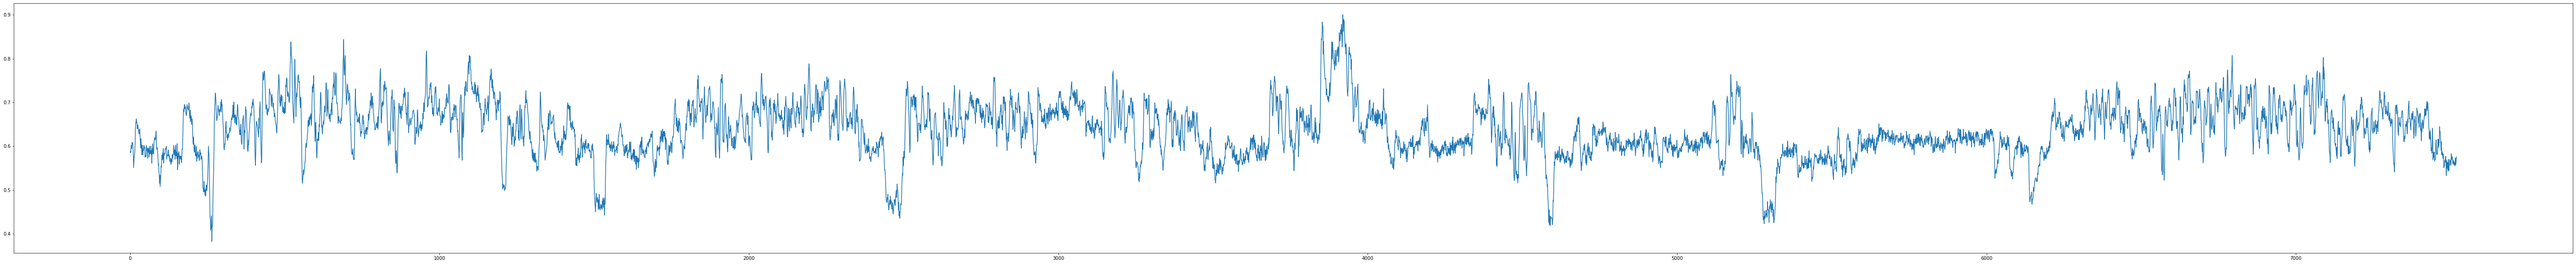

In [8]:
LARs = []
while (VC.isOpened()):
    # read frames
    rval, frame = VC.read()
    if rval:
        lar, frame = process_frame(frame)
        LARs = LARs + lar
    else: 
        break

plt.figure(figsize=(100,10))
x = np.arange(len(LARs))
plt.plot(x, LARs,'-')
plt.show()

In [9]:
print('Min:', min(LARs))
print('Max:', max(LARs))
print('Avg:', np.mean(LARs))
print('Std:', np.std(LARs))

Min: 0.3823666184276258
Max: 0.9002474066078935
Avg: 0.6364279352212924
Std: 0.0619987748788807


11.33 - 15.58 :
Min: 0.3823666184276258
Max: 0.7200887723165178
Avg: 0.6245014171595378
Std: 0.07392072616780564


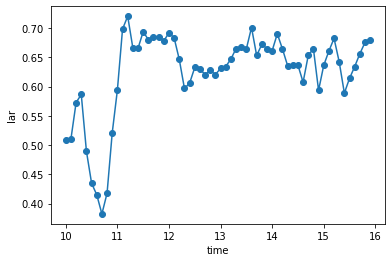

16.39 - 23.09 :
Min: 0.5152343734048249
Max: 0.8377639420753897
Avg: 0.6781809615253009
Std: 0.0591499176973067


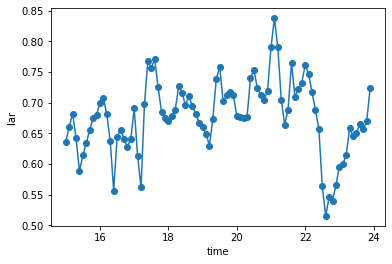

23.7 - 28.73 :
Min: 0.5152343734048249
Max: 0.7843838166441464
Avg: 0.6769178152907527
Std: 0.06000115300637085


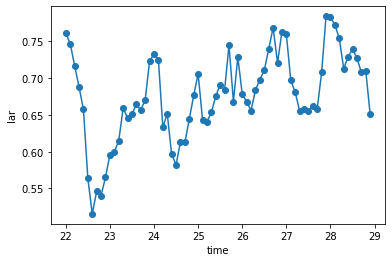

30.02 - 35.66 :
Min: 0.5388784501379733
Max: 0.7771456215106126
Avg: 0.6632320495118461
Std: 0.04643351449898783


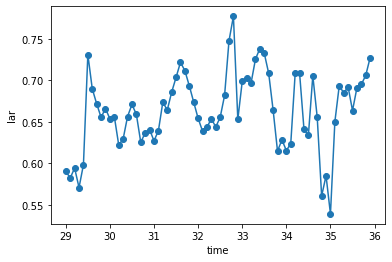

36.17 - 39.3 :
Min: 0.5388784501379733
Max: 0.8131042814717835
Avg: 0.6772949780208483
Std: 0.04249422872365909


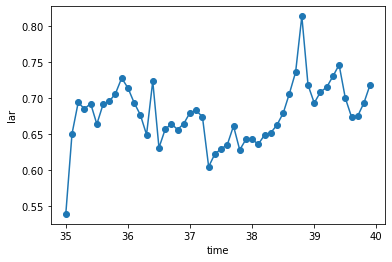

39.52 - 44.6 :
Min: 0.5679258734025869
Max: 0.8131042814717835
Avg: 0.6922316467187531
Std: 0.044837234486274684


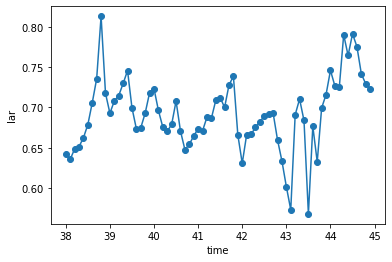

46.23 - 51.75 :
Min: 0.5007159880493095
Max: 0.7761856104226322
Avg: 0.6648986912038012
Std: 0.061806422826345915


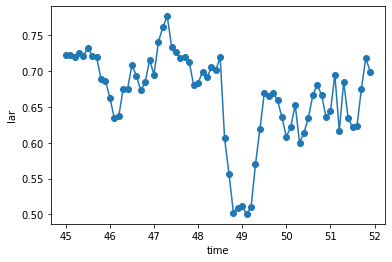

53.64 - 55.7 :
Min: 0.5532218741913822
Max: 0.7076094466306141
Avg: 0.6239067414062465
Std: 0.042660498887835435


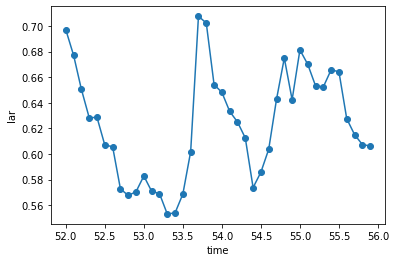

71.75 - 75.59 :
Min: 0.5582291225146939
Max: 0.7347643985451644
Avg: 0.6554918036282315
Std: 0.04443059861469421


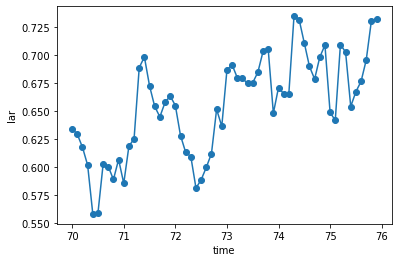

76.06 - 79.76 :
Min: 0.579140799882039
Max: 0.7517710074099834
Avg: 0.6578516572762806
Std: 0.04343079181957611


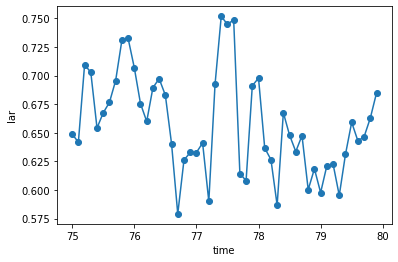

80.23 - 84.18 :
Min: 0.5696306320277704
Max: 0.7652507452941165
Avg: 0.662383045665041
Std: 0.04009383066323907


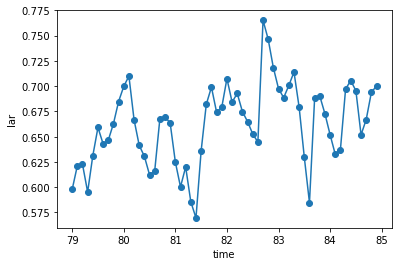

85.55 - 91.16 :
Min: 0.6141525115809691
Max: 0.7770307696580432
Avg: 0.6830125858256854
Std: 0.036637305527713424


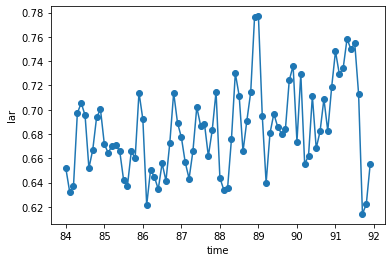

91.69 - 95.37 :
Min: 0.565752618910254
Max: 0.758421455399768
Avg: 0.6775938033806816
Std: 0.04376611465962883


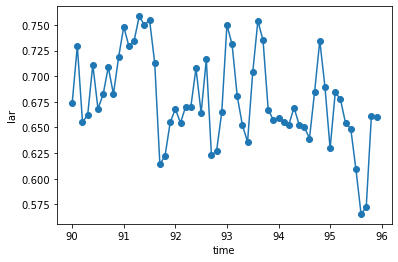

102.05 - 107.52 :
Min: 0.46970472848488126
Max: 0.7374702667929082
Avg: 0.6457181830994775
Std: 0.053467483014571784


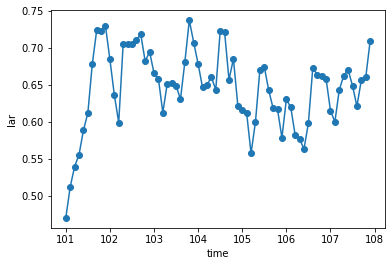

108.14 - 111.73 :
Min: 0.5997943017214799
Max: 0.738993006627021
Avg: 0.6710990434592432
Std: 0.032788547599288266


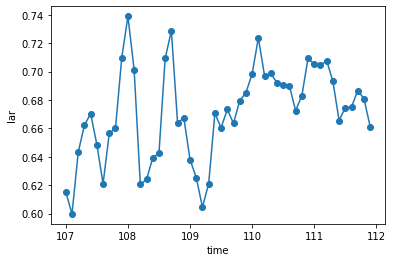

112.38 - 118.14 :
Min: 0.579651337668793
Max: 0.757975292958521
Avg: 0.6646464875964683
Std: 0.037709133387420136


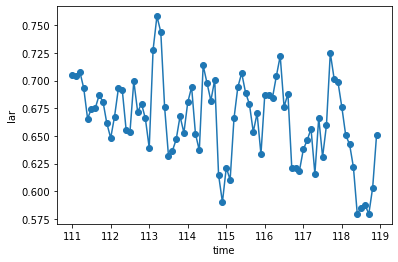

127.87 - 131.58 :
Min: 0.551042070741291
Max: 0.7713337941443666
Avg: 0.6587995039707198
Std: 0.0461668019279377


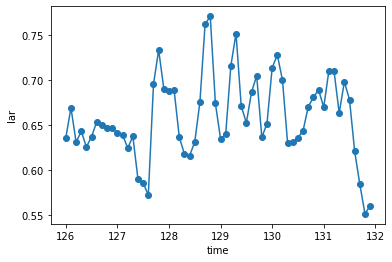

133.16 - 139.32 :
Min: 0.5186731824878605
Max: 0.7171566406531176
Avg: 0.6387033333853622
Std: 0.045458982462682165


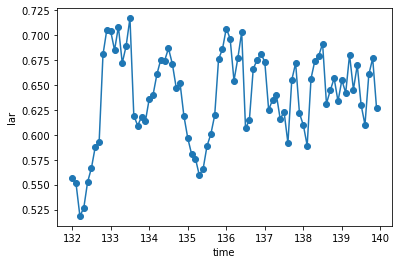

154.24 - 157.55 :
Min: 0.5761302599018049
Max: 0.8834706341841961
Avg: 0.6977954135686032
Std: 0.07769501644464828


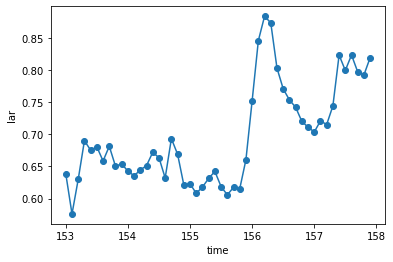

159.19 - 164.8 :
Min: 0.602951442120572
Max: 0.8893854202903689
Avg: 0.7125574095039955
Std: 0.0790666835812516


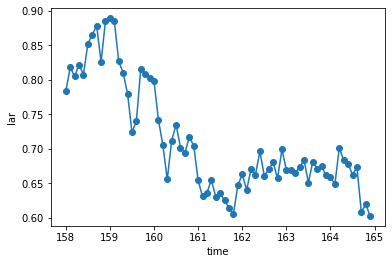

177.73 - 180.74 :
Min: 0.5536527143756583
Max: 0.7532253923439672
Avg: 0.6550758707352949
Std: 0.04381678078447346


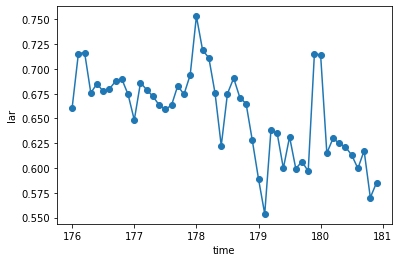

181.95 - 185.04 :
Min: 0.4547495049776709
Max: 0.7406225301763278
Avg: 0.6186476091235557
Std: 0.06685361533431658


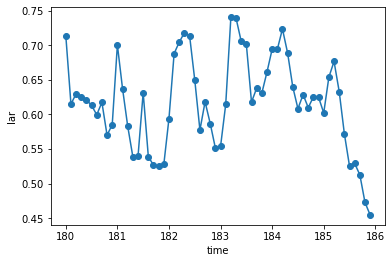

209.0 - 213.15 :
Min: 0.48267243842718793
Max: 0.763780193067033
Avg: 0.6193365729172342
Std: 0.06303843307966273


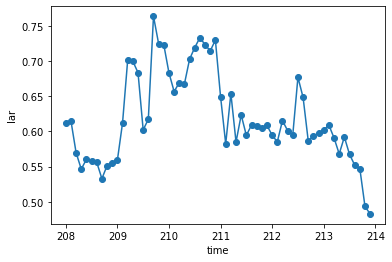

252.69 - 256.0 :
Min: 0.5803570083061086
Max: 0.7283011059013711
Avg: 0.6456739462099237
Std: 0.030534119844989525


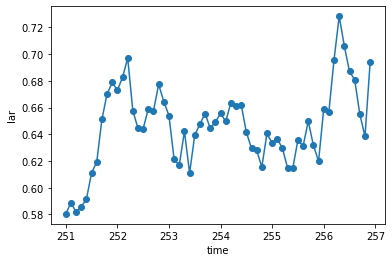

256.25 - 262.34 :
Min: 0.5785909464951956
Max: 0.7470402095174875
Avg: 0.6633628070549182
Std: 0.038019154361239545


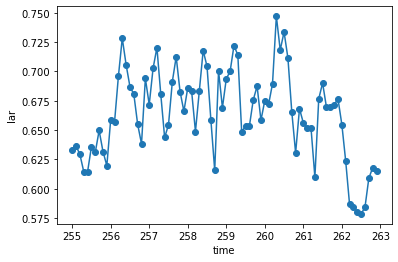

263.47 - 269.38 :
Min: 0.5224830121866422
Max: 0.7650751574325299
Avg: 0.6536571648001205
Std: 0.050150448778261275


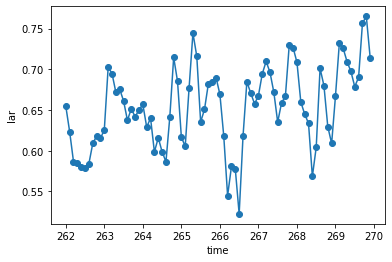

269.39 - 273.48 :
Min: 0.5684556432205676
Max: 0.7650751574325299
Avg: 0.6768027417092277
Std: 0.04601748365785041


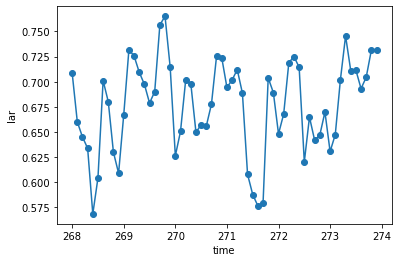

273.73 - 279.05 :
Min: 0.581477023384362
Max: 0.7798674965716
Avg: 0.6842668509079204
Std: 0.04417282565265703


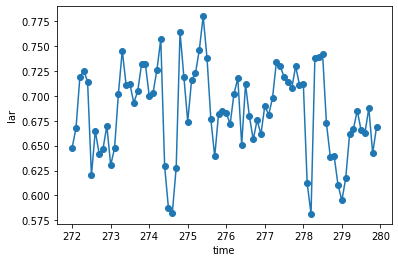

279.34 - 284.63 :
Min: 0.5684644881039608
Max: 0.7417617127744286
Avg: 0.6631372088385933
Std: 0.04370214109878277


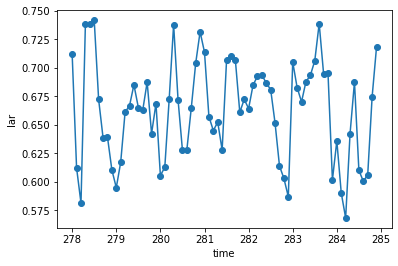

290.89 - 296.42 :
Min: 0.5544116015811699
Max: 0.7208575453548843
Avg: 0.6466422844096954
Std: 0.04007843275189195


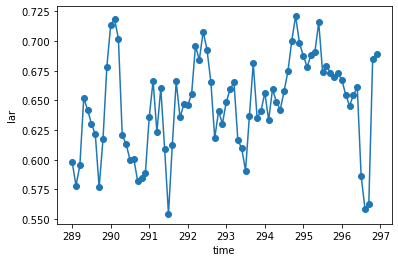

296.42 - 302.98 :
Min: 0.5588714630824295
Max: 0.7156725786873666
Avg: 0.6472051813481358
Std: 0.036554352365458856


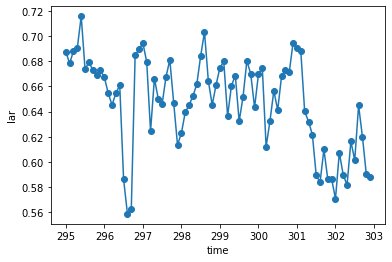

In [11]:
for (start, end) in duration:
    t = int(start - 1) * 1000
    Lars = []
    while t < int(end + 1)  * 1000:
        VC.set(cv2.CAP_PROP_POS_MSEC, t)
        rval, frame = VC.read()
        if rval:
            lar, frame = process_frame(frame)
            # plt.imshow(frame)
        else:
            lar = [0]
        Lars = Lars + lar
        t += 100
    
    print(start, '-', end, ':')
    print('Min:', min(Lars))
    print('Max:', max(Lars))
    print('Avg:', np.mean(Lars))
    print('Std:', np.std(Lars))
    x = np.arange(int(start - 1), int(end + 1), 0.1)
    plt.plot(x, Lars,'o-')
    plt.xlabel('time')
    plt.ylabel('lar')
    plt.show()